In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uncertainties as u

In [22]:
#Densidades
Mh = u.ufloat(18.016, 0.001)
Mo = u.ufloat(46.068, 0.001)

xh = np.zeros(11)
for i in range(11):
    xh[i] = i * 0.1

mh = (20 * Mh * xh) / (Mo * (1-xh) + Mh * xh)
for i in range(11):
    print("$ {} $  &  $ {} $  &  $ {} $ \\ \hline".format(np.round(xh[i],1), np.round(mh[i].n, 3), 20 - np.round(mh[i].n, 3)))

$ 0.0 $  &  $ 0.0 $  &  $ 20.0 $ \ \hline
$ 0.1 $  &  $ 0.833 $  &  $ 19.167 $ \ \hline
$ 0.2 $  &  $ 1.781 $  &  $ 18.219 $ \ \hline
$ 0.3 $  &  $ 2.871 $  &  $ 17.129 $ \ \hline
$ 0.4 $  &  $ 4.136 $  &  $ 15.864 $ \ \hline
$ 0.5 $  &  $ 5.623 $  &  $ 14.376999999999999 $ \ \hline
$ 0.6 $  &  $ 7.395 $  &  $ 12.605 $ \ \hline
$ 0.7 $  &  $ 9.543 $  &  $ 10.457 $ \ \hline
$ 0.8 $  &  $ 12.201 $  &  $ 7.7989999999999995 $ \ \hline
$ 0.9 $  &  $ 15.575 $  &  $ 4.425000000000001 $ \ \hline
$ 1.0 $  &  $ 20.0 $  &  $ 0.0 $ \ \hline


In [117]:
ph = u.ufloat(1.000, 0.000)
po = u.ufloat(0.789, 0.000)
pa = u.ufloat(0.808, 0.004)

m = (20 * 0.04 * (ph / pa) - 20 * xh * (0.04 * (ph / pa) + 0.96 * (po / pa) * (Mh / Mo))) / (xh * (1 - 0.04 * (ph / pa) - 0.96 * (po/pa) * (Mh / Mo)) + 0.04 * (ph/pa) - 1)
for i in range(11):
    print("$ {:.1f} $  &  $ {:.2u} $  &  $ {:.2u} $ \\\\ \\hline".format(xh[i], m[i], 20 - m[i]))

$ 0.0 $  &  $ -1.0417+/-0.0054 $  &  $ 21.0417+/-0.0054 $ \\ \hline
$ 0.1 $  &  $ -0.17698+/-0.00089 $  &  $ 20.17698+/-0.00089 $ \\ \hline
$ 0.2 $  &  $ 0.8088+/-0.0038 $  &  $ 19.1912+/-0.0038 $ \\ \hline
$ 0.3 $  &  $ 1.9431+/-0.0087 $  &  $ 18.0569+/-0.0087 $ \\ \hline
$ 0.4 $  &  $ 3.262+/-0.014 $  &  $ 16.738+/-0.014 $ \\ \hline
$ 0.5 $  &  $ 4.815+/-0.018 $  &  $ 15.185+/-0.018 $ \\ \hline
$ 0.6 $  &  $ 6.670+/-0.022 $  &  $ 13.330+/-0.022 $ \\ \hline
$ 0.7 $  &  $ 8.925+/-0.024 $  &  $ 11.075+/-0.024 $ \\ \hline
$ 0.8 $  &  $ 11.725+/-0.024 $  &  $ 8.275+/-0.024 $ \\ \hline
$ 0.9 $  &  $ 15.294+/-0.018 $  &  $ 4.706+/-0.018 $ \\ \hline
$ 1.0 $  &  $ 20.0000000000000000000+/-0.0000000000000000018 $  &  $ (0.0+/-1.8)e-18 $ \\ \hline


In [129]:
x = 0.11897
mr = (20 * 0.04 * (ph / pa) - 20 * x * (0.04 * (ph / pa) + 0.96 * (po / pa) * (Mh / Mo))) / (x * (1 - 0.04 * (ph / pa) - 0.96 * (po/pa) * (Mh / Mo)) + 0.04 * (ph/pa) - 1)
print("{:.2u}".format(mr))

(-1.4+/-5.9)e-05


In [48]:
d = pd.read_csv("datos.csv", sep=';', decimal=',')

labels = []
for i in range(11):
    if i == 10:
        labels.append("1,0")
    else:
        labels.append("0,{}".format(i))

In [51]:
def inicio(c, s=[5.0, 3.5]):
    import matplotlib
    from cycler import cycler

    ccycler = 0
    if c <= 2:
        ccycler = (cycler(color=["royalblue", "tomato"]))
    if c == 3:
        ccycler = (cycler(color=["royalblue", "mediumseagreen", "tomato"]))
    if c >= 4:
        ccycler = (cycler(color=["royalblue", "mediumseagreen", "sandybrown", "tomato", "orchid"]))
    matplotlib.rcParams['axes.prop_cycle'] = ccycler

def guardar(n, xl, yl, leg=True, lab=True):
    import matplotlib.pyplot as plt
    if lab:
        plt.xlabel(xl)
        plt.ylabel(yl, rotation=0, labelpad=20)
    if leg: plt.legend()
    plt.savefig(n + ".pgf", bbox_inches = "tight")

In [52]:
#Regresión lineal con término independiente
def reg_lin(x, y):
    print("---\nRegresión lineal con término independiente\n---")

    n = len(x)

    sx = x.sum()
    sy = y.sum()
    sxy = (x*y).sum()
    sx2 = (x**2).sum()
    sy2 = (y**2).sum()

    a = (sy*sx2 - sx*sxy) / (n*sx2 - sx**2)
    b = (n*sxy - sx*sy) / (n*sx2 - sx**2)

    sdesv = ((y - a - b*x)**2).sum()
    s = (sdesv/float(n-2))*0.5
    sa = s*(sx2 / (n*sx2 - sx**2))**0.5
    sb = s*(n / (n*sx2 - sx**2))**0.5

    r = (n*sxy - sx*sy)/(((n*sx2 - sx**2)*(n*sy2 - sy**2))**0.5)

    print("a=", a, "b=", b)
    print("s=", s, "sa=", sa, "sb=", sb)
    print("r=", r, "\n---")

    return (a, b, s, sa, sb, r)

10
---
Regresión lineal con término independiente
---
a= 1.0063018181818741 b= -0.0003418181818195697
s= 1.292929292928993e-09 sa= 7.2837219209499214e-09 sb= 2.4655194226951006e-10
r= -0.9963980077519172 
---
9
---
Regresión lineal con término independiente
---
a= 0.9782400000000022 b= -0.0005563636363630326
s= 5.252525252529135e-10 sa= 2.9590120303887793e-09 sb= 1.0016172654708574e-10
r= -0.9994451201561777 
---
8
---
Regresión lineal con término independiente
---
a= 0.9583472727272132 b= -0.0007054545454518443
s= 1.0909090909088058e-09 sa= 6.1456403708013156e-09 sb= 2.0802820128989301e-10
r= -0.9992833727452868 
---
7
---
Regresión lineal con término independiente
---
a= 0.9317627272727872 b= -0.0007290909090924221
s= 5.000000000004674e-10 sa= 2.816751836620639e-09 sb= 9.534625892464835e-11
r= -0.9996923081734693 
---
6
---
Regresión lineal con término independiente
---
a= 0.9094000000000089 b= -0.0008000000000006254
s= 5.684220265500409e-29 sa= 3.202207574517913e-28 sb= 1.0839382744

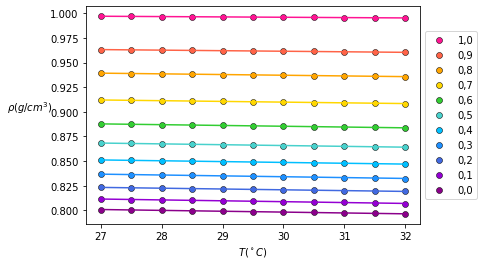

In [80]:
T = d["T"].to_numpy()

colors = ["deeppink", "tomato", "orange", "gold", "limegreen", "mediumturquoise", "deepskyblue", "dodgerblue", "royalblue", "darkviolet", "darkmagenta"]

plt.clf()
plt.subplot(111)

for i in range(11):
    di = d[labels[10-i]].to_numpy()
    plt.scatter(T, di, edgecolors="black", linewidth=0.5, c=colors[i], label=labels[10-i])
    print(10-i)
    a, b, s, sa, sb, r = reg_lin(T, di)
    xr = np.linspace(min(T), max(T), 10)
    yr = a + b*xr
    plt.plot(xr, yr, color=colors[i])
    
plt.legend(bbox_to_anchor=(1,0.5), loc="center left", ncol=1)
plt.xlabel("$T (^\\circ C)$")
plt.ylabel("$\\rho (g/cm^3)$", rotation=0, labelpad=20)
plt.savefig("dens" + ".pgf", bbox_inches = "tight")

In [110]:
x = np.ones(11)
for i in range(11):
    x[i] -= 0.1 * i

max_i, max_r = 0, 0

for i in range(11):
    j = 32 - i * 0.5
    print(j)
    
    p = d[d["T"] == j].iloc[:, 1:].to_numpy()[0]
    
    par = np.polyfit(x, p, 2)
    pol = np.poly1d(par)
    yhat = pol(x)
    ybar = np.sum(p)/len(p)
    SST = np.sum((p - ybar)**2)
    SSreg = np.sum((yhat - ybar)**2)
    R2 = SSreg/SST
    
    if R2 > max_r:
        max_r = R2
        max_i = j

    print(R2, par)

print(max_r, max_i)

32.0
0.9994629497179179 [0.12376457 0.07142634 0.7981965 ]
31.5
0.9994691364497683 [0.12327506 0.07175221 0.7985958 ]
31.0
0.999456925111177 [0.12319347 0.07142471 0.79924266]
30.5
0.9994587095865456 [0.12301865 0.07135408 0.79973007]
30.0
0.999470050645178 [0.12261072 0.07160746 0.80010979]
29.5
0.9994600497155056 [0.12208625 0.07199557 0.80045385]
29.0
0.9994743888941185 [0.12136364 0.07248182 0.80082727]
28.5
0.9995034954810048 [0.12125874 0.07237762 0.80128881]
28.0
0.9995060147448749 [0.12066434 0.07276294 0.80166783]
27.5
0.9995050656092951 [0.12008159 0.07314569 0.80204406]
27.0
0.9995194335732711 [0.11937063 0.07368392 0.8023965 ]
0.9995194335732711 27.0


[0.00552564 0.0057371  0.0012331 ]


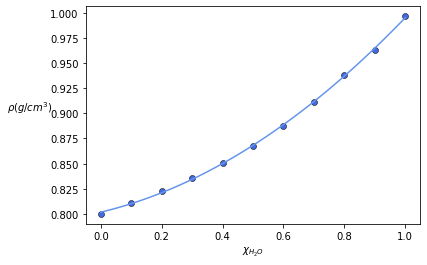

In [115]:
p = d[d["T"] == 28].iloc[:, 1:].to_numpy()[0]
par, cov = np.polyfit(x, p, 2, cov=True)
print(np.sqrt(np.diag(cov)))

xs = np.linspace(min(x), max(x), 100)
ys = par[2] + par[1] * xs + par[0] * xs**2

plt.scatter(x, p, edgecolors="black", linewidth=0.5, c="royalblue")
plt.plot(xs, ys, c="cornflowerblue")
guardar("t28", "$\\chi_{H_2O}$", "$\\rho (g/cm^3)$", leg=False)

In [176]:
A = u.ufloat(0.8017, 0.0012)
B = u.ufloat(0.0728, 0.0057)
C = u.ufloat(0.1207, 0.0055)

x = 0.11897

rho = A + B*x + C*x**2
print("{:.2u}".format(rho))

0.8121+/-0.0014


In [177]:
ph = u.ufloat(1.000, 0.000)
po = u.ufloat(0.789, 0.000)
p96 = u.ufloat(0.808, 0.004)
Mh = u.ufloat(18.016, 0.001)
Mo = u.ufloat(46.068, 0.001)

xh = np.zeros(11)
for i in range(11):
    xh[i] = i * 0.1

mh = (20 * Mh * xh) / (Mo * (1-xh) + Mh * xh)
m96 = 20 - mh

for i in range(11):
    mh[i] = u.ufloat(mh[i].n, 0.011)
    m96[i] = u.ufloat(m96[i].n, 0.011)

#mh = u.ufloat(0, 0.011)
#m96 = u.ufloat(20, 0.011)

xr = 1.0 / (1.0 + (Mh / Mo) * ((0.96 * m96 * po) / (mh*p96 + 0.04*m96*ph)))

for i in range(11):
    print("{:.2u}".format(xr[i]))

0.1190+/-0.0012
0.2023+/-0.0011
0.2866+/-0.0011
0.3719+/-0.0011
0.4583+/-0.0012
0.5458+/-0.0012
0.6344+/-0.0011
0.72407+/-0.00098
0.81488+/-0.00076
0.90685+/-0.00047
1.00000+/-0.00020


In [180]:
import uncertainties as u

p = d[d["T"] == 28].iloc[:, 1:].to_numpy()[0][::-1]
pu = []
for i in range(11):
    pu.append(u.ufloat(p[i], 0.0001))
pu = np.array(pu)
    
ve = ((xr*Mh + (1-xr)*Mo)/pu) - ((xr*Mh)/(ph) + ((1-xr)*Mo)/(po))

A = (Mh / p) - (Mh / ph)
B = (Mo / p) - (Mo / po)
C = -((xr*Mh + (1-xr)*Mo) / (p**2))
D = -xr * (Mh / (ph**2))
E = -(1-xr) * (Mo / (po**2))

sxr = []
for i in xr:
    sxr.append(i.s)
sxr = np.array(sxr)

verr = ((A**2 * sxr**2) + (B**2 * sxr**2) + (C**2 * 0.0001**2) + (D**2 * ph.s**2) + (E**2 * po**2))**0.5

for i in range(11):
    print("{:.2u} & {:.2u}".format(xr[i], ve[i]))

0.1190+/-0.0012 & -0.1715+/-0.0091
0.2023+/-0.0011 & -0.3897+/-0.0087
0.2866+/-0.0011 & -0.5823+/-0.0088
0.3719+/-0.0011 & -0.7420+/-0.0093
0.4583+/-0.0012 & -0.8262+/-0.0099
0.5458+/-0.0012 & -0.898+/-0.010
0.6344+/-0.0011 & -0.903+/-0.010
0.72407+/-0.00098 & -0.8924+/-0.0099
0.81488+/-0.00076 & -0.7623+/-0.0084
0.90685+/-0.00047 & -0.3483+/-0.0057
1.00000+/-0.00020 & 0.0596+/-0.0031


[4.8854201  8.74343715 3.8956665 ]
0.9779472560496184


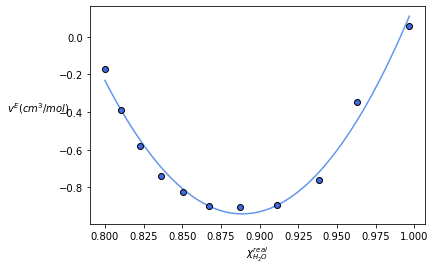

In [160]:
y, ys = [], []
for v in ve:
    y.append(v.n)
    ys.append(v.s)
y = np.array(x)
ys = np.array(xs)

par, cov = np.polyfit(p, y, 2, cov=True)
print(np.sqrt(np.diag(cov)))

pol = np.poly1d(par)

yhat = pol(p)
ybar = np.sum(y)/len(y)
SST = np.sum((y - ybar)**2)
SSreg = np.sum((yhat - ybar)**2)
R2 = SSreg/SST
print(R2)

xr = np.linspace(min(p), max(p), 100)
yr = par[2] + par[1] * xr + par[0] * xr**2

plt.errorbar(p, y, yerr=ys, fmt="o", mec="black", linewidth=0.5, c="royalblue")
plt.plot(xr, yr, c="cornflowerblue")
guardar("ve", "$\\chi_{H_2O}^{real}$", "$v^E (cm^3/mol)$", leg=False)

In [214]:
m = (20 * 0.04 * (ph / pa) - 20 * xr * (0.04 * (ph / pa) + 0.96 * (po / pa) * (Mh / Mo))) / (xr * (1 - 0.04 * (ph / pa) - 0.96 * (po/pa) * (Mh / Mo)) + 0.04 * (ph/pa) - 1)

#mh = (20 * Mh * xh) / (Mo * (1-xh) + Mh * xh)
#for i in range(11):
    #m[i] = u.ufloat(m[i].n, 0.011)


vph2o = (Mh / pu) + ((((20 - m) * Mh) / (m + 0.0000000000001)) * (1/pu - 1/po))
vpoh = (Mo / pu) + (((m * Mo) / ((20.000000000001 - m))) * (1/pu - 1/ph))

for i in range(11):
    print("$ {:.2u} $  &  $ {:.2u} $".format(vph2o[i], vpoh[i]))

$ (-0.0+/-6.9)e+24 $  &  $ 57.5850+/-0.0097 $
$ 8.22+/-0.22 $  &  $ 57.300+/-0.010 $
$ 12.392+/-0.094 $  &  $ 56.982+/-0.012 $
$ 13.909+/-0.064 $  &  $ 56.628+/-0.014 $
$ 14.874+/-0.049 $  &  $ 56.293+/-0.018 $
$ 15.484+/-0.040 $  &  $ 55.856+/-0.022 $
$ 16.011+/-0.032 $  &  $ 55.380+/-0.027 $
$ 16.411+/-0.025 $  &  $ 54.644+/-0.031 $
$ 16.868+/-0.017 $  &  $ 53.796+/-0.037 $
$ 17.5435+/-0.0091 $  &  $ 54.135+/-0.052 $
$ 18.0756+/-0.0033 $  &  $ (0.0+/-3.4)e+22 $


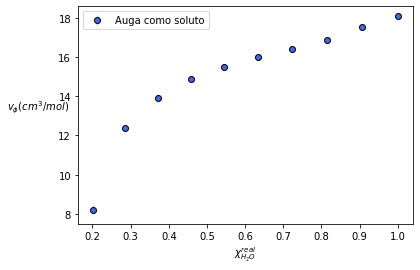

In [218]:
y, yerr = [], []
for v in vph2o:
    y.append(v.n)
    yerr.append(v.s)
y = np.array(y)[1:]
yerr = np.array(yerr)[1:]
x = []
for i in xr:
    x.append(i.n)
x = np.array(x)[1:]

plt.errorbar(x, y, yerr=yerr, fmt="o", mec="black", linewidth=0.5, c="royalblue", label="Auga como soluto")
guardar("vah2o", "$\\chi_{H_2O}^{real}$", "$v_\phi (cm^3/mol)$", leg=True)

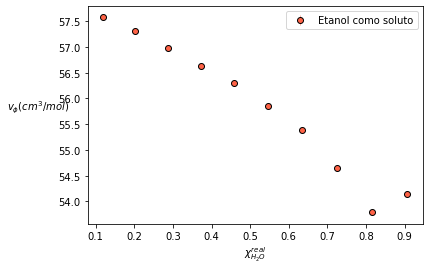

In [219]:
y, yerr = [], []
for v in vpoh:
    y.append(v.n)
    yerr.append(v.s)
y = np.array(y)[:-1]
yerr = np.array(yerr)[:-1]
x = []
for i in xr:
    x.append(i.n)
x = np.array(x)[:-1]

plt.errorbar(x, y, yerr=yerr, fmt="o", mec="black", linewidth=0.5, c="tomato", label="Etanol como soluto")
guardar("vaoh", "$\\chi_{H_2O}^{real}$", "$v_\phi (cm^3/mol)$", leg=True)

In [221]:
vbarh = Mh / pu
vbaro = Mo / pu

for i in range(11):
    print("$ {:.2u} $  &  $ {:.2u} $".format(vbarh[i], vbaro[i]))

$ 22.5200+/-0.0031 $  &  $ 57.5850+/-0.0073 $
$ 22.2255+/-0.0030 $  &  $ 56.8320+/-0.0071 $
$ 21.9040+/-0.0029 $  &  $ 56.0097+/-0.0069 $
$ 21.5528+/-0.0028 $  &  $ 55.1119+/-0.0067 $
$ 21.1878+/-0.0028 $  &  $ 54.1785+/-0.0065 $
$ 20.7677+/-0.0027 $  &  $ 53.1043+/-0.0062 $
$ 20.3112+/-0.0026 $  &  $ 51.9369+/-0.0060 $
$ 19.7696+/-0.0024 $  &  $ 50.5520+/-0.0057 $
$ 19.1945+/-0.0023 $  &  $ 49.0816+/-0.0053 $
$ 18.7140+/-0.0022 $  &  $ 47.8529+/-0.0051 $
$ 18.0756+/-0.0021 $  &  $ 46.2205+/-0.0047 $


---
Regresión lineal con término independiente
---
a= 23.3493485421333 b= -5.049352278076724
s= 0.011743907832813497 sa= 0.007851261032244069 sb= 0.012711051094131173
r= -0.9951786157282354 
---


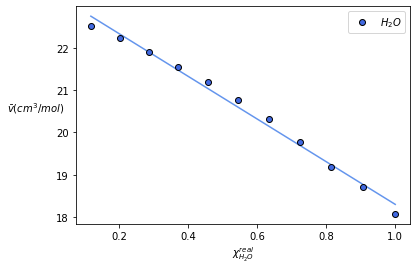

In [226]:
y = []
for v in vbarh:
    y.append(v.n)
y = np.array(y)

xr = 1.0 / (1.0 + (Mh / Mo) * ((0.96 * m96 * po) / (mh*p96 + 0.04*m96*ph)))
x = []
for i in xr:
    x.append(i.n)
x = np.array(x)

plt.errorbar(x, y, fmt="o", mec="black", linewidth=0.5, c="royalblue", label="$H_2O$")

a, b, s, sa, sb, r = reg_lin(x, y)
xs = np.linspace(min(x), max(x), 10)
ys = a + b*xs
plt.plot(xs, ys, color="cornflowerblue")

guardar("vbarh", "$\\chi_{H_2O}^{real}$", "$\\bar{v} (cm^3/mol)$", leg=True)

---
Regresión lineal con término independiente
---
a= 59.70569430722673 b= -12.911498709282718
s= 0.07678822065611961 sa= 0.05133592439206988 sb= 0.08311194281175824
r= -0.9951786157282191 
---


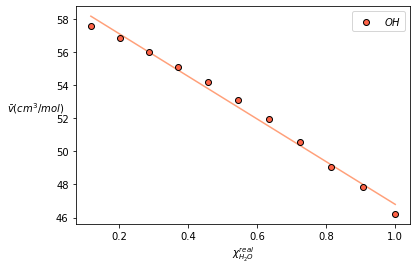

In [227]:
y = []
for v in vbaro:
    y.append(v.n)
y = np.array(y)

xr = 1.0 / (1.0 + (Mh / Mo) * ((0.96 * m96 * po) / (mh*p96 + 0.04*m96*ph)))
x = []
for i in xr:
    x.append(i.n)
x = np.array(x)

plt.errorbar(x, y, fmt="o", mec="black", linewidth=0.5, c="tomato", label="$OH$")

a, b, s, sa, sb, r = reg_lin(x, y)
xs = np.linspace(min(x), max(x), 10)
ys = a + b*xs
plt.plot(xs, ys, color="lightsalmon")

guardar("vbaro", "$\\chi_{H_2O}^{real}$", "$\\bar{v} (cm^3/mol)$", leg=True)